## Economic Data Analysis with Fred Library

In [1]:
!pip install fredapi >/dev/null

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred

pd.set_option('max_columns', 500)
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()['color']
fred_key = '9545489bc034266471d05f9f44df0918'

### 1. Create the Fred Object


In [3]:
fred = Fred(api_key = fred_key)

### 2. Search for economic data

In [4]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-10-13,2022-10-13,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-10-11,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-10-12 08:46:12-05:00,96,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-10-13,2022-10-13,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-09-27 15:48:02-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-10-13,2022-10-13,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-10-11,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-10-12 08:46:16-05:00,86,This data represents the effective yield of th...
SP500,SP500,2022-10-13,2022-10-13,S&P 500,2012-10-15,2022-10-12,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-10-12 19:10:48-05:00,84,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2022-10-13,2022-10-13,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,82,Household data are collected as of March. As ...


### 3. Pull Raw Data and plot


In [5]:
sp500 = fred.get_series(series_id='SP500')
sp500

2012-10-15    1440.13
2012-10-16    1454.92
2012-10-17    1460.91
2012-10-18    1457.34
2012-10-19    1433.19
               ...   
2022-10-06    3744.52
2022-10-07    3639.66
2022-10-10    3612.39
2022-10-11    3588.84
2022-10-12    3577.03
Length: 2608, dtype: float64

<AxesSubplot:title={'center':'S&P 500'}>

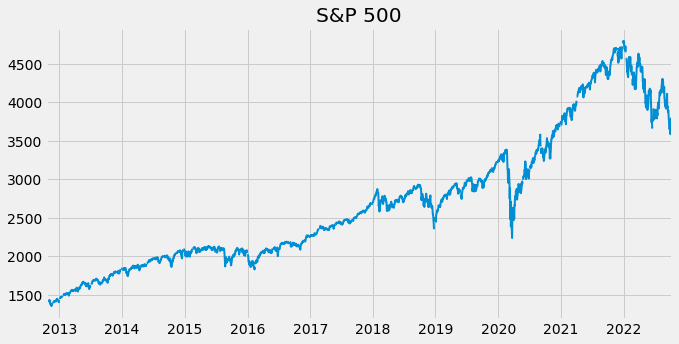

In [6]:
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)

### 4. Pull and Join Multiple Data Series

In [7]:
unemp_results = fred.search('unemployment')
unemp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-10-13,2022-10-13,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:01-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-10-13,2022-10-13,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-10-07 07:43:02-05:00,60,The unemployment rate represents the number of...
NROU,NROU,2022-10-13,2022-10-13,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,72,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2022-10-13,2022-10-13,Unemployment Level,1948-01-01,2022-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-10-07 07:44:02-05:00,70,The series comes from the 'Current Population ...
CCSA,CCSA,2022-10-13,2022-10-13,Continued Claims (Insured Unemployment),1967-01-07,2022-10-01,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-10-13 07:33:03-05:00,70,"Continued claims, also referred to as insured ..."


In [8]:
unrate = fred.get_series('UNRATE')
unrate.head()

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

<AxesSubplot:>

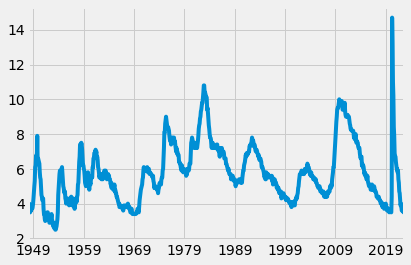

In [9]:
unrate.plot()

In [10]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-10-13,2022-10-13,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:01-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-10-13,2022-10-13,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-10-07 07:43:02-05:00,60,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2022-10-13,2022-10-13,Unemployment Level,1948-01-01,2022-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-10-07 07:44:02-05:00,70,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2022-10-13,2022-10-13,Unemployment Rate - Black or African American,1972-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:03-05:00,68,The series comes from the 'Current Population ...
U6RATE,U6RATE,2022-10-13,2022-10-13,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:03-05:00,67,The series comes from the 'Current Population ...


In [11]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [12]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df = unemp_df.reset_index()
unemp_df = unemp_df[unemp_df['series id'].str.isalpha()]
unemp_df.head()

,series id,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
0,UNRATE,UNRATE,2022-10-13,2022-10-13,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:01-05:00,94,The unemployment rate represents the number of...
5,CAUR,CAUR,2022-10-13,2022-10-13,Unemployment Rate in California,1976-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-19 09:29:02-05:00,56,None
7,TXUR,TXUR,2022-10-13,2022-10-13,Unemployment Rate in Texas,1976-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-19 09:28:02-05:00,51,None
10,FLUR,FLUR,2022-10-13,2022-10-13,Unemployment Rate in Florida,1976-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-19 09:29:03-05:00,49,None
11,NYUR,NYUR,2022-10-13,2022-10-13,Unemployment Rate in New York,1976-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-19 09:29:04-05:00,48,None


In [13]:
unemp_df.set_index('series id', inplace=True)
unemp_df.index

Index(['UNRATE', 'CAUR', 'TXUR', 'FLUR', 'NYUR', 'OHUR', 'ALUR', 'MIUR',
       'PAUR', 'KYUR', 'ILUR', 'NCUR', 'VAUR', 'COUR', 'NJUR', 'WIUR', 'SCUR',
       'WAUR', 'INUR', 'MNUR', 'GAUR', 'TNUR', 'AKUR', 'AZUR', 'LAUR', 'OKUR',
       'MOUR', 'ARUR', 'MAUR', 'NDUR', 'WVUR', 'UTUR', 'HIUR', 'IAUR', 'ORUR',
       'NMUR', 'MDUR', 'MSUR', 'NEUR', 'MTUR', 'DCUR', 'NVUR', 'SDUR', 'KSUR',
       'PRUR', 'CTUR', 'RIUR', 'DEUR', 'NHUR', 'CMWRUR', 'MEUR', 'IDUR',
       'WYUR', 'CNERUR', 'VTUR', 'CNEWUR', 'CWSTUR', 'CSOUUR'],
      dtype='object', name='series id')

In [14]:
all_results = []
    
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [15]:
all_results[1]

,CAUR
1976-01-01,9.2
1976-02-01,9.2
1976-03-01,9.1
1976-04-01,9.1
1976-05-01,9.0
...,...
2022-04-01,4.6
2022-05-01,4.3
2022-06-01,4.2
2022-07-01,3.9


In [16]:
unemp_results = pd.concat(all_results, axis = 1)
unemp_results

,UNRATE,CAUR,TXUR,FLUR,NYUR,OHUR,ALUR,MIUR,PAUR,KYUR,ILUR,NCUR,VAUR,COUR,NJUR,WIUR,SCUR,WAUR,INUR,MNUR,GAUR,TNUR,AKUR,AZUR,LAUR,OKUR,MOUR,ARUR,MAUR,NDUR,WVUR,UTUR,HIUR,IAUR,ORUR,NMUR,MDUR,MSUR,NEUR,MTUR,DCUR,NVUR,SDUR,KSUR,PRUR,CTUR,RIUR,DEUR,NHUR,CMWRUR,MEUR,IDUR,WYUR,CNERUR,VTUR,CNEWUR,CWSTUR,CSOUUR
1948-01-01,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-02-01,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-03-01,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-04-01,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-05-01,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,3.6,4.3,4.2,2.9,4.4,3.9,2.7,4.3,4.6,3.8,4.6,3.4,3.0,3.5,3.9,2.9,3.3,3.9,2.2,2.0,3.0,3.3,4.6,3.2,4.0,2.8,3.1,3.2,3.9,2.6,3.5,2.0,4.1,2.7,3.5,5.1,4.0,3.9,1.9,2.4,5.7,4.9,2.3,2.3,6.2,4.2,2.9,4.5,2.1,3.4,3.2,2.5,3.2,4.2,2.3,3.6,4.0,3.5
2022-06-01,3.6,4.2,4.1,2.8,4.4,3.9,2.6,4.3,4.5,3.7,4.5,3.4,2.8,3.4,3.9,2.9,3.2,3.8,2.4,1.8,2.9,3.3,4.6,3.3,3.8,2.9,2.8,3.2,3.7,2.5,3.6,2.0,4.2,2.6,3.5,4.9,4.0,3.8,1.9,2.6,5.5,4.7,2.3,2.4,6.1,4.0,2.7,4.5,2.0,3.3,3.0,2.5,3.1,4.1,2.2,3.5,3.8,3.4
2022-07-01,3.5,3.9,4.0,2.7,4.3,3.9,2.6,4.2,4.3,3.7,4.4,3.4,2.7,3.3,3.7,3.0,3.2,3.7,2.6,1.8,2.8,3.3,4.5,3.3,3.7,2.9,2.5,3.3,3.5,2.3,3.7,2.0,4.0,2.5,3.5,4.5,3.9,3.6,2.0,2.7,5.2,4.4,2.3,2.4,5.9,3.7,2.7,4.4,2.0,3.3,2.8,2.6,3.0,4.0,2.1,3.3,3.7,3.4
2022-08-01,3.7,4.1,4.1,2.7,4.7,4.0,2.6,4.1,4.2,3.8,4.5,3.5,2.6,3.4,4.0,3.1,3.1,3.7,2.8,1.9,2.8,3.4,4.6,3.5,3.5,3.1,2.5,3.4,3.6,2.3,3.9,2.0,4.1,2.6,3.7,4.4,4.3,3.6,2.1,2.8,5.1,4.4,2.3,2.5,5.8,4.1,2.8,4.5,2.0,3.4,3.1,2.7,3.1,4.1,2.1,3.4,3.7,3.4


In [17]:
unemp_states = unemp_results.drop('UNRATE', axis=1)
unemp_states = unemp_states.dropna()

### Pull April 2022 Unemployment Rate Per State

In [18]:
title_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
title_to_state

{'UNRATE': 'Unemployment Rate',
 'CAUR': 'California',
 'TXUR': 'Texas',
 'FLUR': 'Florida',
 'NYUR': 'New York',
 'OHUR': 'Ohio',
 'ALUR': 'Alabama',
 'MIUR': 'Michigan',
 'PAUR': 'Pennsylvania',
 'KYUR': 'Kentucky',
 'ILUR': 'Illinois',
 'NCUR': 'North Carolina',
 'VAUR': 'Virginia',
 'COUR': 'Colorado',
 'NJUR': 'New Jersey',
 'WIUR': 'Wisconsin',
 'SCUR': 'South Carolina',
 'WAUR': 'Washington',
 'INUR': 'Indiana',
 'MNUR': 'Minnesota',
 'GAUR': 'Georgia',
 'TNUR': 'Tennessee',
 'AKUR': 'Alaska',
 'AZUR': 'Arizona',
 'LAUR': 'Louisiana',
 'OKUR': 'Oklahoma',
 'MOUR': 'Missouri',
 'ARUR': 'Arkansas',
 'MAUR': 'Massachusetts',
 'NDUR': 'North Dakota',
 'WVUR': 'West Virginia',
 'UTUR': 'Utah',
 'HIUR': 'Hawaii',
 'IAUR': 'Iowa',
 'ORUR': 'Oregon',
 'NMUR': 'New Mexico',
 'MDUR': 'Maryland',
 'MSUR': 'Mississippi',
 'NEUR': 'Nebraska',
 'MTUR': 'Montana',
 'DCUR': 'the District of Columbia',
 'NVUR': 'Nevada',
 'SDUR': 'South Dakota',
 'KSUR': 'Kansas',
 'PRUR': 'Puerto Rico',
 'CTUR'

In [19]:
unemp_states.columns = [title_to_state[c] for c in unemp_states.columns]

In [20]:
unemp_states

,California,Texas,Florida,New York,Ohio,Alabama,Michigan,Pennsylvania,Kentucky,Illinois,North Carolina,Virginia,Colorado,New Jersey,Wisconsin,South Carolina,Washington,Indiana,Minnesota,Georgia,Tennessee,Alaska,Arizona,Louisiana,Oklahoma,Missouri,Arkansas,Massachusetts,North Dakota,West Virginia,Utah,Hawaii,Iowa,Oregon,New Mexico,Maryland,Mississippi,Nebraska,Montana,the District of Columbia,Nevada,South Dakota,Kansas,Puerto Rico,Connecticut,Rhode Island,Delaware,New Hampshire,Midwest Census Region,Maine,Idaho,Wyoming,Northeast Census Region,Vermont,New England Census Division,West Census Region,South Census Region
1976-01-01,9.2,5.8,9.7,10.3,8.1,6.6,9.9,8.0,5.6,6.6,6.4,6.1,5.8,10.3,5.8,7.4,8.5,6.6,6.0,8.4,6.0,7.1,10.2,6.3,5.8,5.9,7.3,10.5,3.4,7.5,5.8,9.8,4.3,9.5,8.6,6.4,6.7,3.3,5.8,8.7,9.2,3.3,4.2,19.6,9.8,7.8,8.0,6.5,6.8,8.7,5.6,4.1,9.6,8.6,9.6,8.6,6.9
1976-02-01,9.2,5.8,9.7,10.3,8.1,6.6,9.9,8.1,5.6,6.6,6.4,6.1,5.7,10.3,5.8,7.4,8.5,6.6,6.0,8.4,6.0,7.1,10.2,6.3,5.8,5.9,7.3,10.5,3.4,7.5,5.9,9.8,4.3,9.5,8.7,6.4,6.7,3.3,5.8,8.7,9.2,3.3,4.2,19.5,9.8,7.8,8.0,6.5,6.8,8.7,5.6,4.1,9.6,8.6,9.6,8.6,6.9
1976-03-01,9.1,5.9,9.6,10.2,8.1,6.6,9.9,8.1,5.6,6.6,6.4,6.1,5.7,10.3,5.7,7.3,8.4,6.5,5.9,8.4,6.0,7.0,10.1,6.3,5.8,5.9,7.3,10.5,3.4,7.5,5.8,9.8,4.3,9.4,8.7,6.4,6.6,3.3,5.8,8.6,9.2,3.2,4.2,19.3,9.8,7.7,8.0,6.5,6.8,8.6,5.6,4.1,9.6,8.6,9.6,8.6,6.9
1976-04-01,9.1,5.9,9.5,10.2,8.0,6.5,9.8,8.1,5.6,6.6,6.3,6.0,5.6,10.3,5.6,7.2,8.5,6.3,5.8,8.3,6.0,6.9,10.0,6.4,5.8,6.0,7.2,10.3,3.5,7.5,5.8,9.7,4.2,9.2,8.6,6.4,6.4,3.2,5.8,8.5,9.0,3.1,4.2,19.0,9.6,7.7,8.1,6.5,6.7,8.6,5.6,4.0,9.5,8.6,9.4,8.5,6.8
1976-05-01,9.0,5.9,9.3,10.1,7.8,6.4,9.6,8.1,5.5,6.6,6.1,5.9,5.6,10.3,5.5,7.0,8.5,6.0,5.7,8.1,5.9,6.9,9.8,6.5,5.7,6.0,7.1,10.1,3.6,7.4,5.7,9.4,4.1,9.1,8.6,6.5,6.3,3.1,5.8,8.4,8.9,3.1,4.2,18.9,9.4,7.7,8.3,6.5,6.6,8.5,5.6,3.9,9.5,8.5,9.3,8.5,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,4.6,4.3,3.0,4.5,4.0,2.8,4.3,4.8,3.9,4.6,3.4,3.0,3.6,4.1,2.8,3.3,4.1,2.2,2.2,3.1,3.2,4.8,3.2,4.1,2.7,3.4,3.2,4.1,2.8,3.6,1.9,4.1,3.0,3.7,5.3,4.2,4.1,1.9,2.3,5.8,5.0,2.3,2.4,6.4,4.4,3.2,4.5,2.3,3.5,3.3,2.6,3.3,4.4,2.5,3.8,4.1,3.6
2022-05-01,4.3,4.2,2.9,4.4,3.9,2.7,4.3,4.6,3.8,4.6,3.4,3.0,3.5,3.9,2.9,3.3,3.9,2.2,2.0,3.0,3.3,4.6,3.2,4.0,2.8,3.1,3.2,3.9,2.6,3.5,2.0,4.1,2.7,3.5,5.1,4.0,3.9,1.9,2.4,5.7,4.9,2.3,2.3,6.2,4.2,2.9,4.5,2.1,3.4,3.2,2.5,3.2,4.2,2.3,3.6,4.0,3.5
2022-06-01,4.2,4.1,2.8,4.4,3.9,2.6,4.3,4.5,3.7,4.5,3.4,2.8,3.4,3.9,2.9,3.2,3.8,2.4,1.8,2.9,3.3,4.6,3.3,3.8,2.9,2.8,3.2,3.7,2.5,3.6,2.0,4.2,2.6,3.5,4.9,4.0,3.8,1.9,2.6,5.5,4.7,2.3,2.4,6.1,4.0,2.7,4.5,2.0,3.3,3.0,2.5,3.1,4.1,2.2,3.5,3.8,3.4
2022-07-01,3.9,4.0,2.7,4.3,3.9,2.6,4.2,4.3,3.7,4.4,3.4,2.7,3.3,3.7,3.0,3.2,3.7,2.6,1.8,2.8,3.3,4.5,3.3,3.7,2.9,2.5,3.3,3.5,2.3,3.7,2.0,4.0,2.5,3.5,4.5,3.9,3.6,2.0,2.7,5.2,4.4,2.3,2.4,5.9,3.7,2.7,4.4,2.0,3.3,2.8,2.6,3.0,4.0,2.1,3.3,3.7,3.4


In [21]:
# Plot states unemployment rate
px.line(unemp_states)

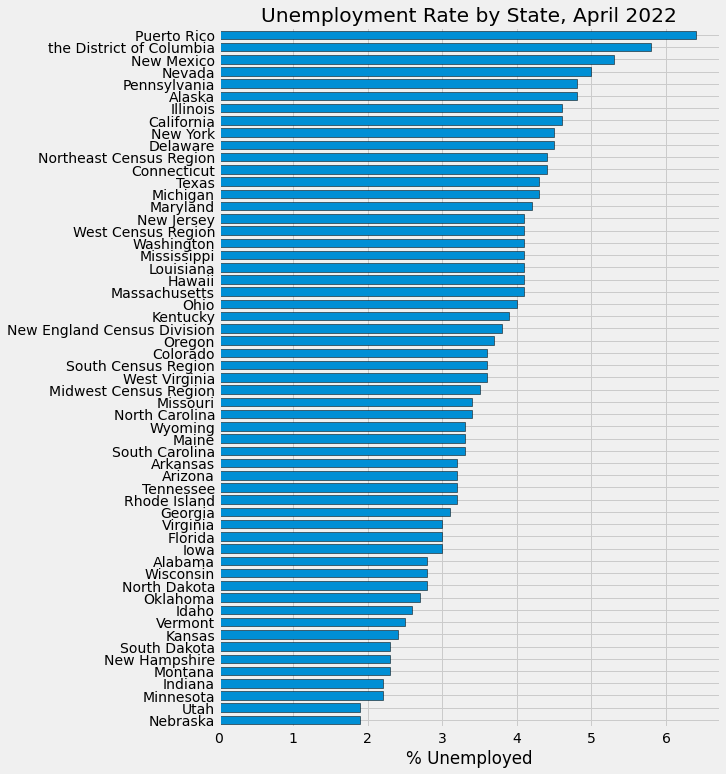

In [22]:
ax = unemp_states.loc[unemp_states.index == '2022-04-01'].T. \
    sort_values('2022-04-01') \
    .plot(kind='barh', figsize= (8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, April 2022')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

### Pull Participation Rate

In [23]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
T10YIEM,T10YIEM,2022-10-13,2022-10-13,10-Year Breakeven Inflation Rate,2003-01-01,2022-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-10-03 16:01:04-05:00,52,The breakeven inflation rate represents a meas...
T5YIEM,T5YIEM,2022-10-13,2022-10-13,5-Year Breakeven Inflation Rate,2003-01-01,2022-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-10-03 16:01:06-05:00,40,The breakeven inflation rate represents a meas...
CIVPART,CIVPART,2022-10-13,2022-10-13,Labor Force Participation Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:02-05:00,87,The series comes from the 'Current Population ...
LNU01300000,LNU01300000,2022-10-13,2022-10-13,Labor Force Participation Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-10-07 07:43:05-05:00,26,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2022-10-13,2022-10-13,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:02-05:00,68,The series comes from the 'Current Population ...


In [24]:
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2022-10-13,2022-10-13,Labor Force Participation Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:02-05:00,87,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2022-10-13,2022-10-13,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:02-05:00,68,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2022-10-13,2022-10-13,Labor Force Participation Rate - Women,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:02-05:00,67,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2022-10-13,2022-10-13,Labor Force Participation Rate - Men,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:03-05:00,61,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2022-10-13,2022-10-13,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:04-05:00,55,The series comes from the 'Current Population ...


In [25]:
part_df.shape

(109, 15)

In [26]:
part_df = part_df.reset_index()
part_df = part_df[~part_df['series id'].str.contains('LNS')]
part_df = part_df[~part_df['series id'].str.contains('LR')]
part_df.set_index('series id', inplace=True)

In [27]:
part_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2022-10-13,2022-10-13,Labor Force Participation Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:02-05:00,87,The series comes from the 'Current Population ...
LBSSA06,LBSSA06,2022-10-13,2022-10-13,Labor Force Participation Rate for California,1976-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-16 09:01:03-05:00,28,A state's labor-force participation rate is th...
LBSSA27,LBSSA27,2022-10-13,2022-10-13,Labor Force Participation Rate for Minnesota,1976-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-16 09:01:02-05:00,29,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2022-10-13,2022-10-13,Labor Force Participation Rate for Alabama,1976-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-16 09:01:13-05:00,9,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2022-10-13,2022-10-13,Labor Force Participation Rate for Florida,1976-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-16 09:01:02-05:00,24,A state's labor-force participation rate is th...


In [28]:
part_title_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

In [29]:
part_all_results = []
    
for myid in part_df.index:
    part_results = fred.get_series(myid)
    part_results = part_results.to_frame(name=myid)
    part_all_results.append(part_results)

part_states = pd.concat(part_all_results, axis = 1)

In [30]:
part_states.columns = [part_title_to_state[c] for c in part_states.columns]
part_states = part_states.dropna()
part_states.head()

,Labor Force Participation Rate,California,Minnesota,Alabama,Florida,Michigan,Texas,New York,Kentucky,Indiana,Colorado,Ohio,Wisconsin,Massachusetts,West Virginia,Pennsylvania,Utah,Georgia,Virginia,North Carolina,Iowa,Arizona,Maine,Illinois,Washington,Mississippi,Maryland,Oklahoma,Missouri,New Hampshire,Tennessee,Nevada,New Mexico,Kansas,New Jersey,Hawaii,Oregon,South Carolina,Connecticut,Idaho,Vermont,Nebraska,South Dakota,Arkansas,Louisiana,Montana,Alaska,Rhode Island,Wyoming,District Of Columbia,North Dakota,Delaware
1976-01-01,61.3,62.6,65.6,57.0,55.8,61.6,63.8,58.0,60.5,64.0,67.2,61.7,65.6,64.8,52.5,58.4,62.8,63.7,65.9,66.5,64.4,59.5,62.1,63.0,60.9,58.8,64.3,59.3,60.5,65.9,59.6,71.3,60.8,65.1,61.5,69.9,62.9,65.3,64.2,63.0,63.6,64.9,64.6,57.9,56.8,62.7,69.0,63.8,65.3,64.4,62.6,62.7
1976-02-01,61.3,62.4,65.5,56.9,55.7,61.5,63.5,58.0,60.3,63.9,67.0,61.7,65.5,64.7,52.4,58.3,62.6,63.6,65.8,66.3,64.3,59.2,61.9,63.0,60.7,58.6,64.2,59.2,60.3,65.6,59.4,70.8,60.5,65.0,61.4,69.6,62.7,65.2,64.1,62.8,63.4,64.9,64.4,57.8,56.6,62.5,68.4,63.7,64.9,64.5,62.4,62.5
1976-03-01,61.3,62.2,65.4,56.8,55.5,61.5,63.4,58.0,60.2,63.8,66.8,61.7,65.4,64.6,52.3,58.3,62.5,63.5,65.6,66.2,64.2,59.1,61.9,62.9,60.6,58.5,64.1,59.1,60.3,65.6,59.3,70.5,60.3,64.9,61.4,69.6,62.5,65.0,64.0,62.7,63.2,64.8,64.4,57.7,56.5,62.4,67.8,63.6,64.7,64.5,62.3,62.5
1976-04-01,61.6,62.2,65.4,56.8,55.5,61.6,63.5,58.0,60.1,63.8,66.6,61.6,65.4,64.6,52.3,58.3,62.5,63.5,65.5,66.2,64.1,59.1,61.8,62.9,60.6,58.5,64.1,59.0,60.4,65.7,59.3,70.4,60.3,65.0,61.5,69.4,62.4,64.9,64.1,62.7,63.5,64.8,64.3,57.7,56.4,62.3,67.9,63.7,64.9,64.5,62.5,62.4
1976-05-01,61.5,62.3,65.5,56.8,55.4,61.7,63.6,58.1,60.1,63.9,66.5,61.6,65.5,64.6,52.2,58.3,62.6,63.6,65.4,66.3,64.1,59.1,61.7,63.0,60.7,58.5,64.1,59.0,60.6,66.0,59.4,70.5,60.3,65.1,61.6,69.3,62.5,64.7,64.3,62.8,63.6,64.8,64.3,57.7,56.4,62.2,67.9,63.6,65.2,64.4,62.6,62.4


### Plot Unemployment vs Participation

In [31]:
unemp_states.rename(columns={'the District of Columbia': 'District of Columbia'}, inplace=True)

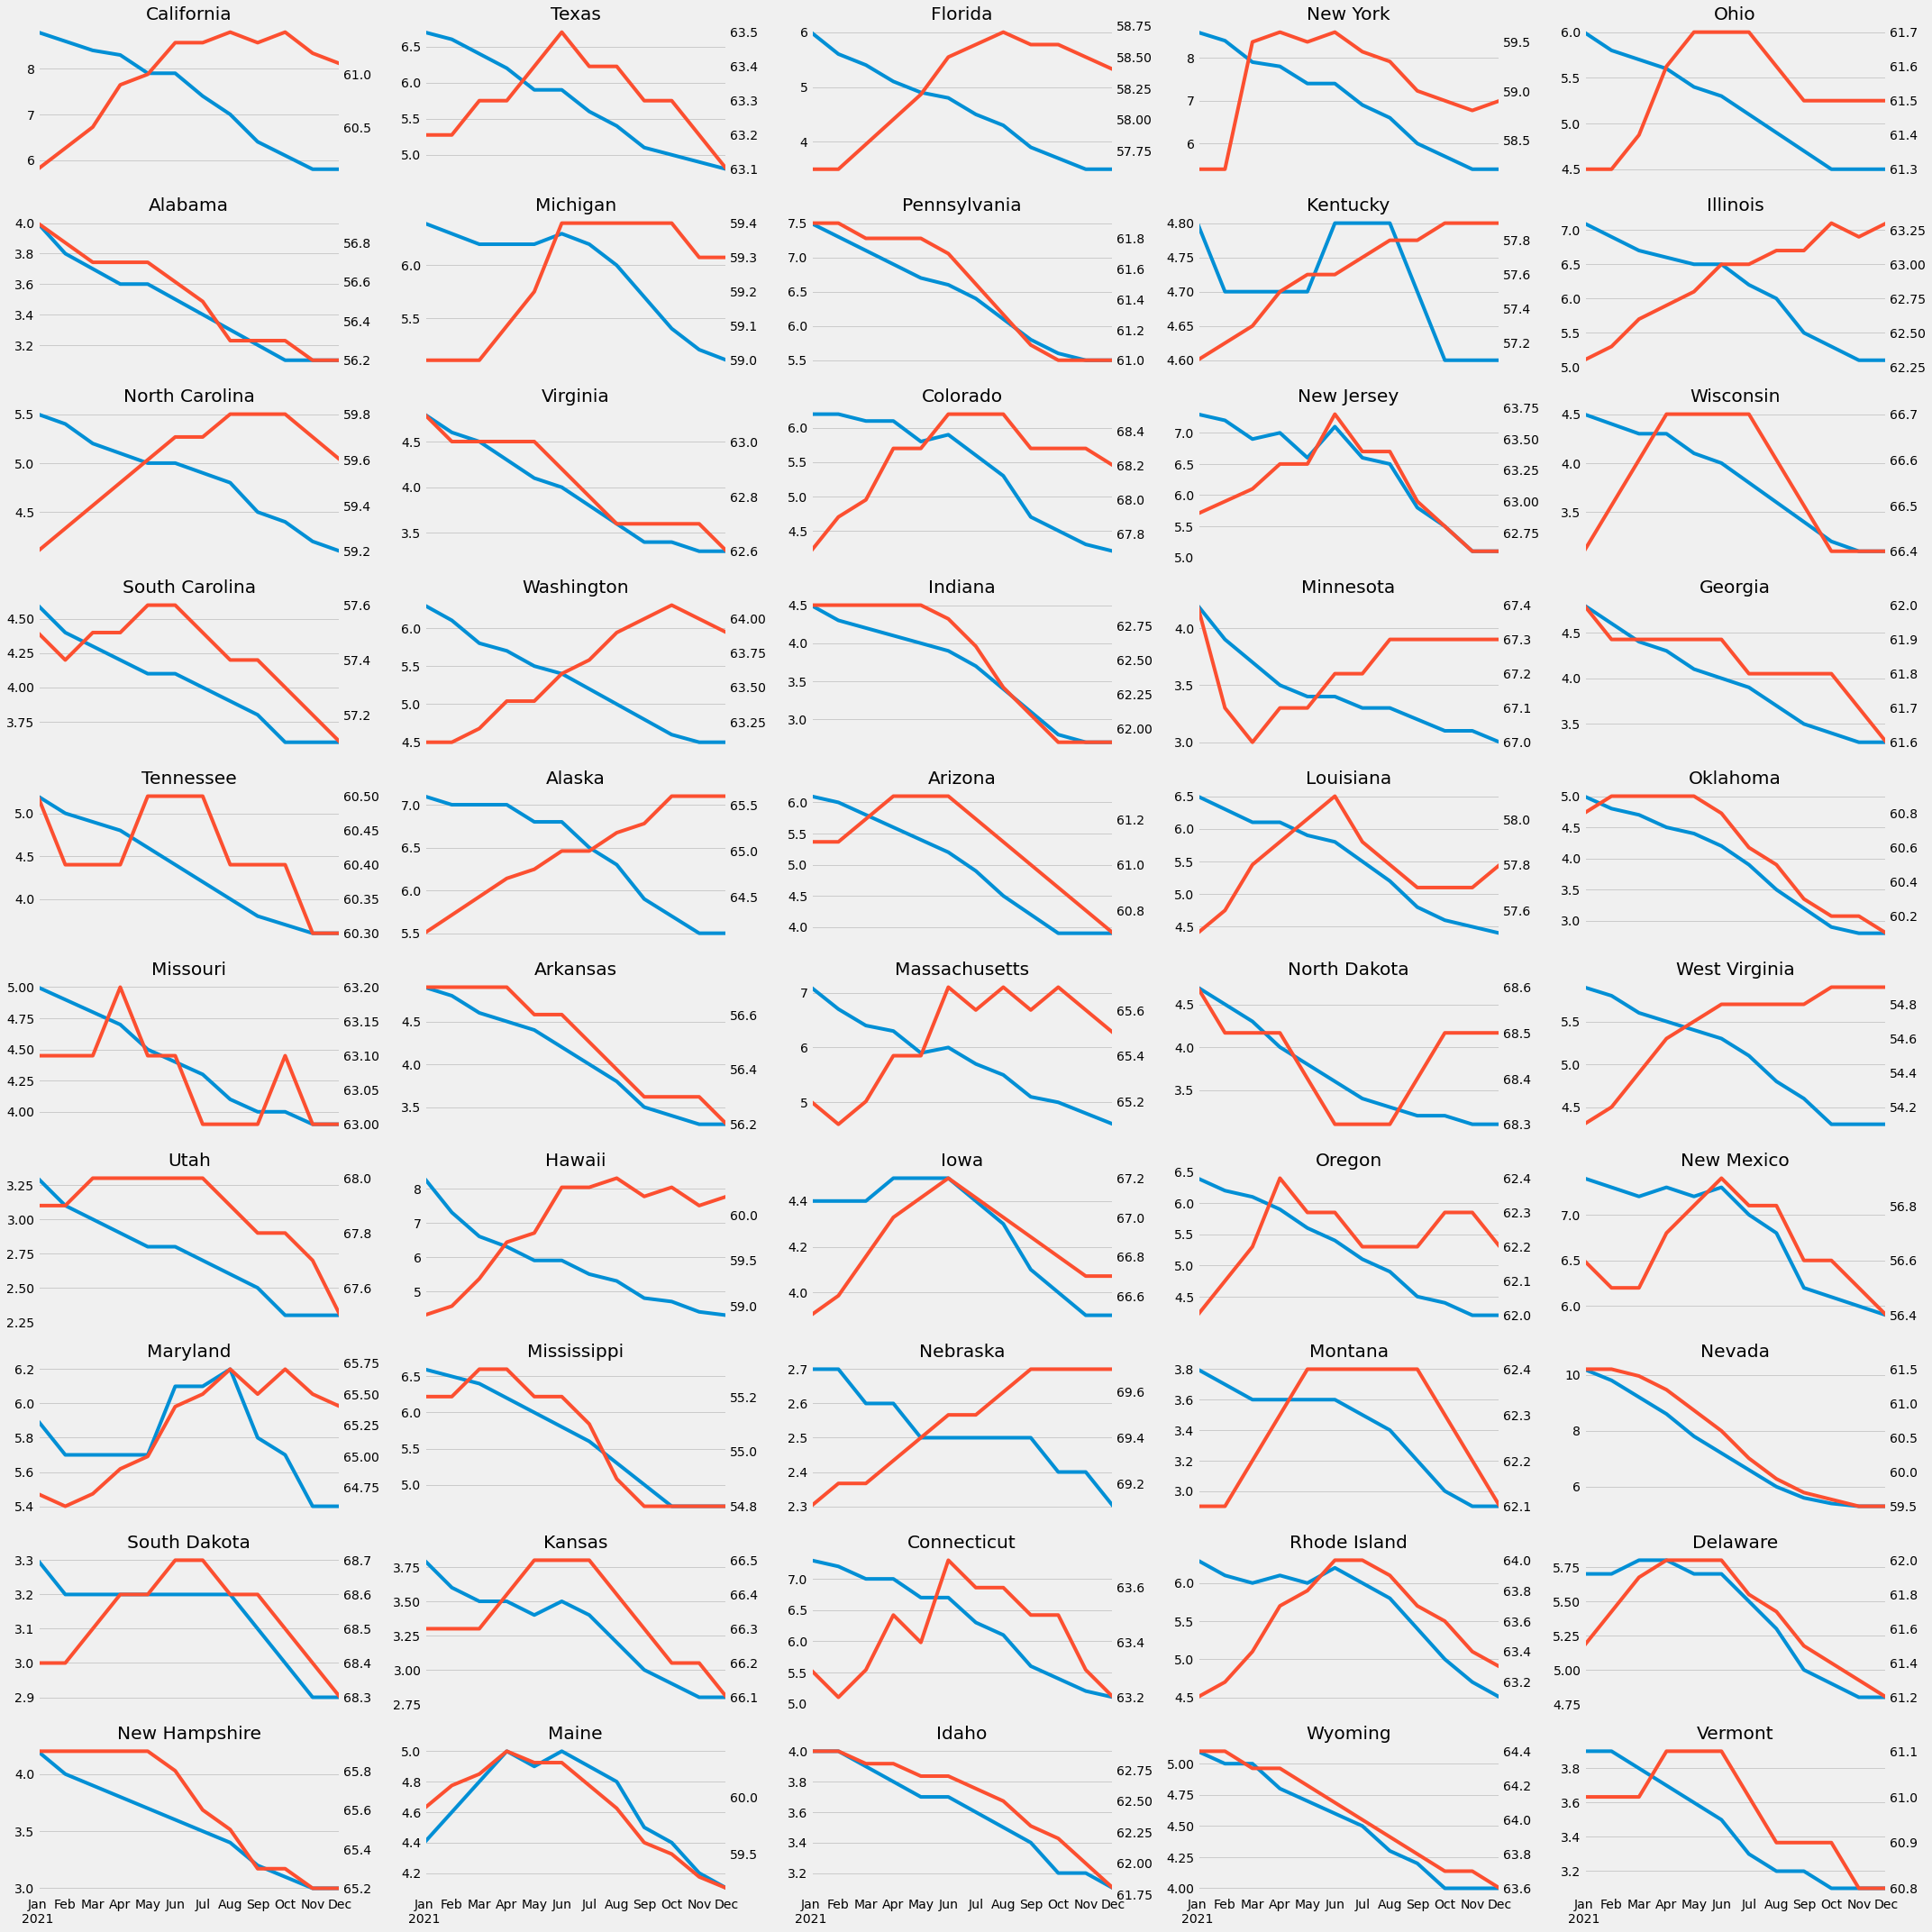

In [39]:
fig,axs = plt.subplots(10,5, figsize=(30,30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    if state in ['District of Columbia', 'Puerto Rico', 'Northeast Census Region', 'New England Census Division', 
                 'Midwest Census Region', 'West Census Region', 'South Census Region']:
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2021 and index < 2022')[state].plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2021 and index < 2022')[state].plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()